<h4> 분류 - 붓꽃의 품종 판별

- 붓꽃 데이터 셋을 학습하여 품종을 판별하는 모델을 만든다.
- 분류 모델의 구조화, 모델 학습 및 성능 개선 프로세스를 이해해야한다.

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- iris의 key 값이다.
- 'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'

In [2]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 150개 붓꽃 샘플의 데이터가 정리되어있다.
- 4개의 설명 변수에는 꽃받침, 꽃잎에 대한 가로, 세로 길이가 포함되어있고
- 분류 대상이 되는 목표 레이블은 3가지 범주(클래스)에 속하는 붓꽃의 품종을 나타낸다.

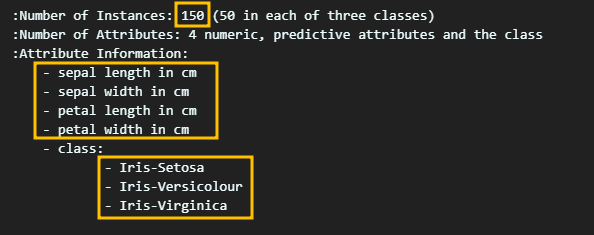

- target의 속성 파악

In [3]:
print("데이터 셋의 크기 : ", iris['target'].shape)

print("데이터 셋의 내용:\n", iris['target'])

데이터 셋의 크기 :  (150,)
데이터 셋의 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- data 속성 파악

In [4]:
print("데이터 셋의 크기 :", iris['data'].shape)

# 첫 7개 행을 추출한다.
print("데이터 셋의 내용 : \n", iris['data'][:7,:])

데이터 셋의 크기 : (150, 4)
데이터 셋의 내용 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


- 붓꽃의 개체에 대한 길이와 폭, 꽃잎의 길이와 폭을 측정한 데이터 셋이다.

- DataFrame 변환
- 4가지 속성 데이터가 있는 2차원 배열을 데이터 프레임으로 변환한다.

In [5]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
print("데이터 프레임의 형태", df.shape)
df.head()

데이터 프레임의 형태 (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 데이터 프레임의 열 이름을 간결하게 바꾼다.

In [6]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [7]:
# target 열 추가하기

df['target'] = iris['target']
print("데이터 셋의 크기 :" , df.shape)
df.head()

데이터 셋의 크기 : (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- 데이터 셋의 기본 정보
- info 메소드는 데이터프레임의 기본 정보를 보여준다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- 모든 열에 150개의 유효(non-null : 결측값이 아닌) 데이터가 있고, 64비트 실수형과 정수형으로 구성되어있다.

In [9]:
# describe 메소드는 150개 샘플의 평균값, 표준편차, 최소값, 최대값 등 통계 정보를 요약해준다.

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- 결측값 확인
- isnull 메소드를 적용하면 각 원소가 결측값인지 여부를 체크한다.
- 결측값이면 True, 정상 데이터면 False 이다.
- sum메소드를 적용해 주면, 각 열의 결측값의 개수를 계산해준다.

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

- 중복 데이터 확인
- duplicated 메소드를 적용하면 동일한 샘플이 중복되어 존재하는지 체크한다.
- 0행부터 시작해서 각 행의 샘플 데이터가 이전 행의 데이터와 중복되면 True로 판별
- sum() 메소드를 적용해 주면 중복 데이터로 판별된 샘플 행의 개수가 계산된다.

In [11]:
df.duplicated().sum()

1

In [12]:
# 중복 데이터 출력

df.loc[df.duplicated(),:]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [13]:
# 142번 샘플은 이전 행에 있는 다른 샘플과 데이터가 중복된다.

df.loc[(df.sepal_length ==5.8 )& (df.petal_width == 1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


- 101번, 142번 샘플이 중복되어있는 걸 확인할 수 있다.

- 중복 데이터를 제거 할 때는 drop_duplicates 메소드를 이용한다.

In [14]:
df = df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width ==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2


- 142번 행의 데이터가 제거되고 101번 행의 데이터만 남는다.

- 상관 관계 분석
- corr 메소드는 변수 간의 상관 계수 행렬을 출력한다.
- 목표 레이블과 상관 계수를 비교하여 분석

In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


- -0.42인 꽃받침 폭을 제외한 나머지 피처들과 상관관계가 높다

<h4> 데이터 시각화
- 시각화 패키지인 matplotlib , sysborn 을 사용하여 불러온다.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본의 글씨 크기 배율을 1.2배로 설정한다.
sns.set(font_scale=1.2)

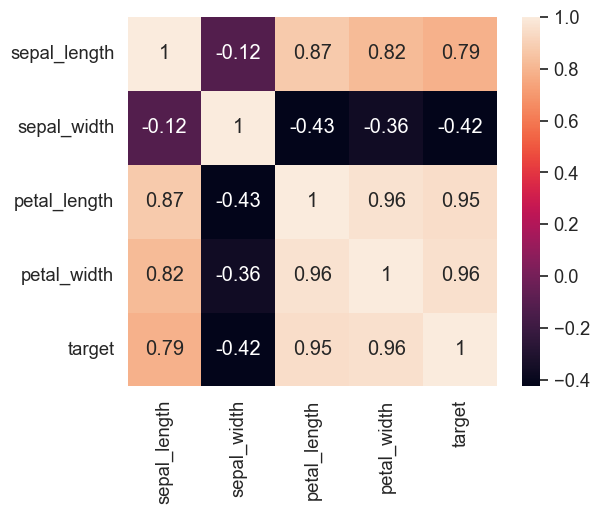

In [17]:
sns.heatmap(data = df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [18]:
# Target 값의 분포 - value-counts 함수 사용

df['target'].value_counts()

0    50
1    50
2    49
Name: target, dtype: int64

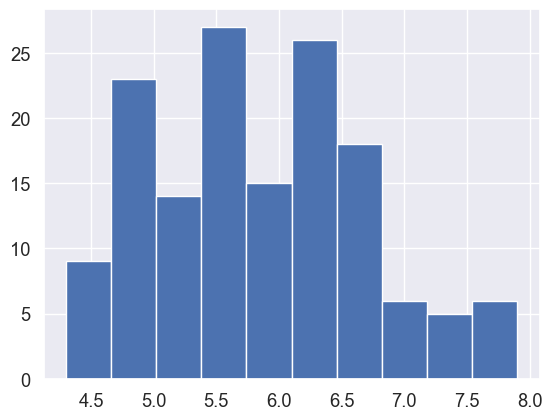

In [19]:
# matplotlib hist함수를 이용하여 sepal_length 열의 데이터를 히스토그램으로 그린다.

plt.hist(x='sepal_length',data = df)
plt.show()

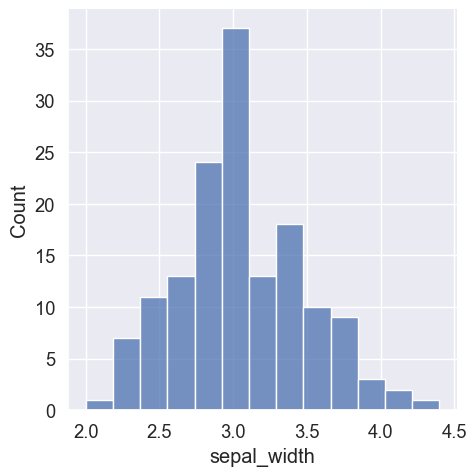

In [20]:
# sepal_width 데이터의 분포를 히스토그램으로 표현한다.

sns.displot(x = 'sepal_width', kind="hist", data= df)
plt.show()

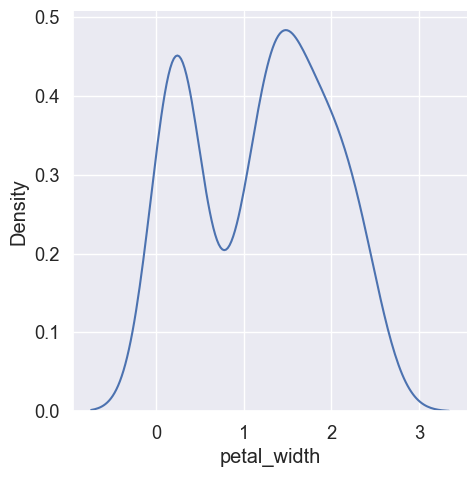

In [21]:
sns.displot(x='petal_width', kind='kde', data= df)
plt.show()

- 두 개의 봉우리 형태로 분포된 것으로 보아 서로 다른 이질적인 데이터가 섞여 있다고 추정해 볼 수 있다.

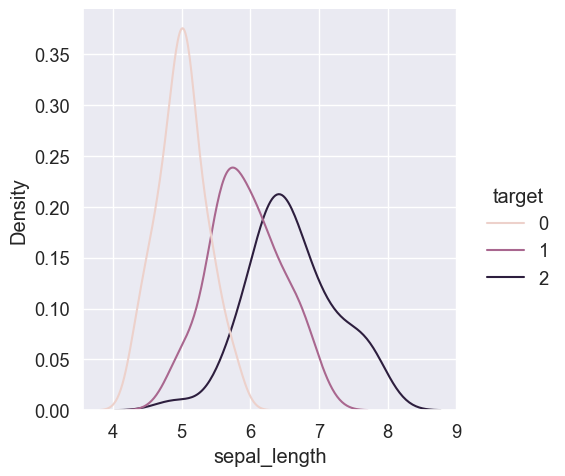

In [22]:
# 품종별 sepal_length 데이터의 분포를 그려본다.
# hue 옵션을 적용하여 목표 변수 target 열의 품종 별로 데이터를 구별하여 kde 밀도함수를 그린다.

sns.displot(x='sepal_length', kind= 'kde', hue='target', data= df)
plt.show()

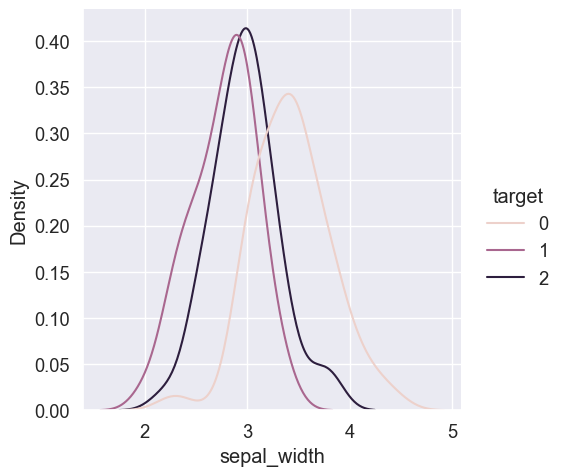

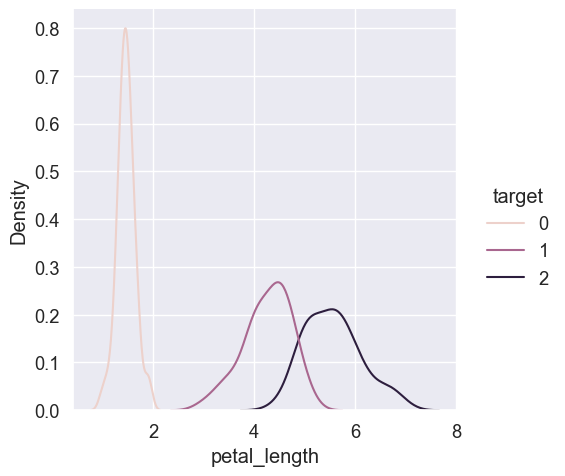

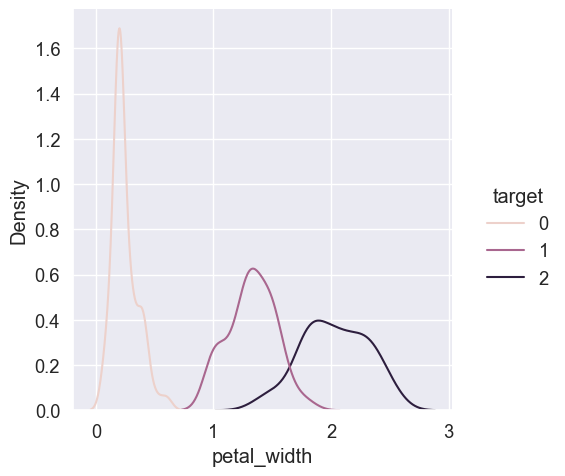

In [23]:
# 나머지 3개의 특징들도 품종별 분포를 시각화해본다

for col in ['sepal_width','petal_length','petal_width']:
    sns.displot(x=col, hue = 'target', kind= "kde", data=df)
plt.show()

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


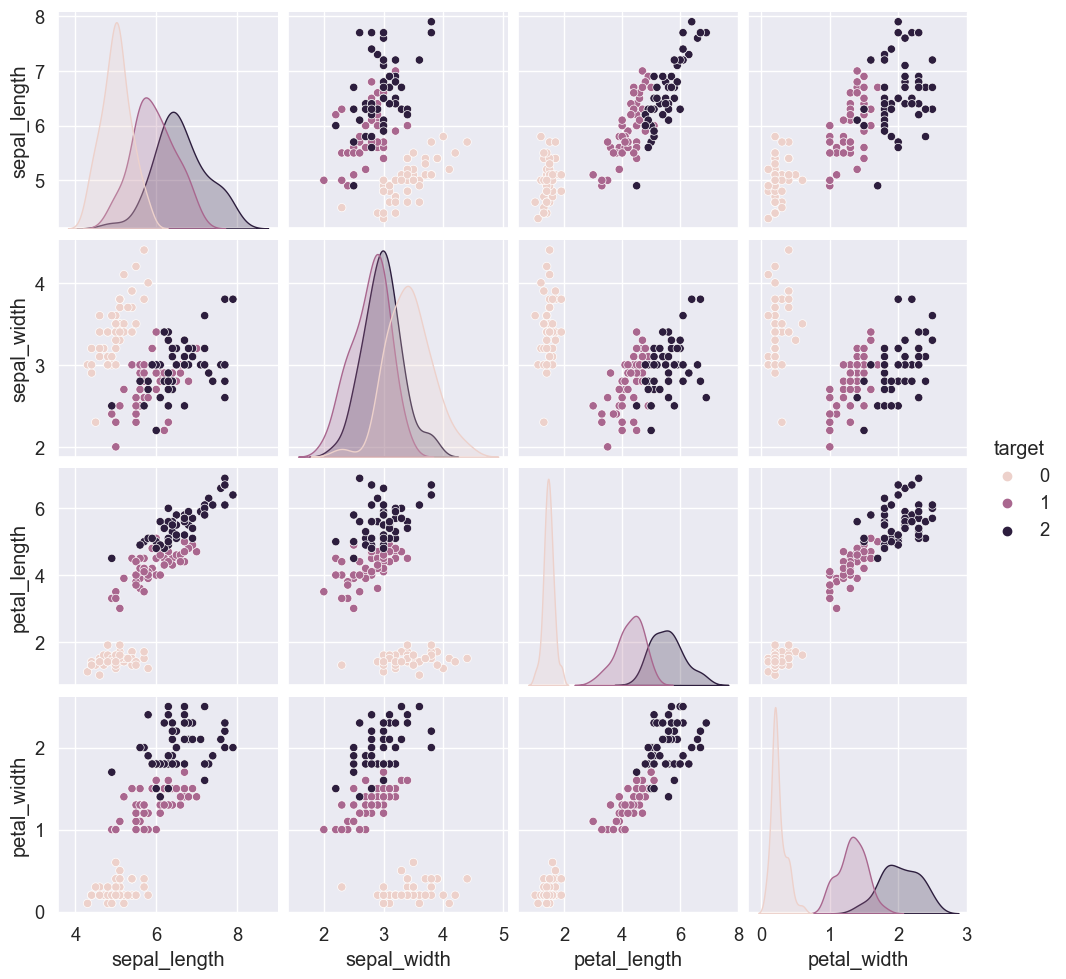

In [24]:
# 시본 pariplot을 이용하면 서로 다른 피처 간 관계를 나타내는 그래프를 한번에 그릴 수 있다.

sns.pairplot(df, hue = 'target', size = 2.5, diag_kind='kde')
plt.show()


c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


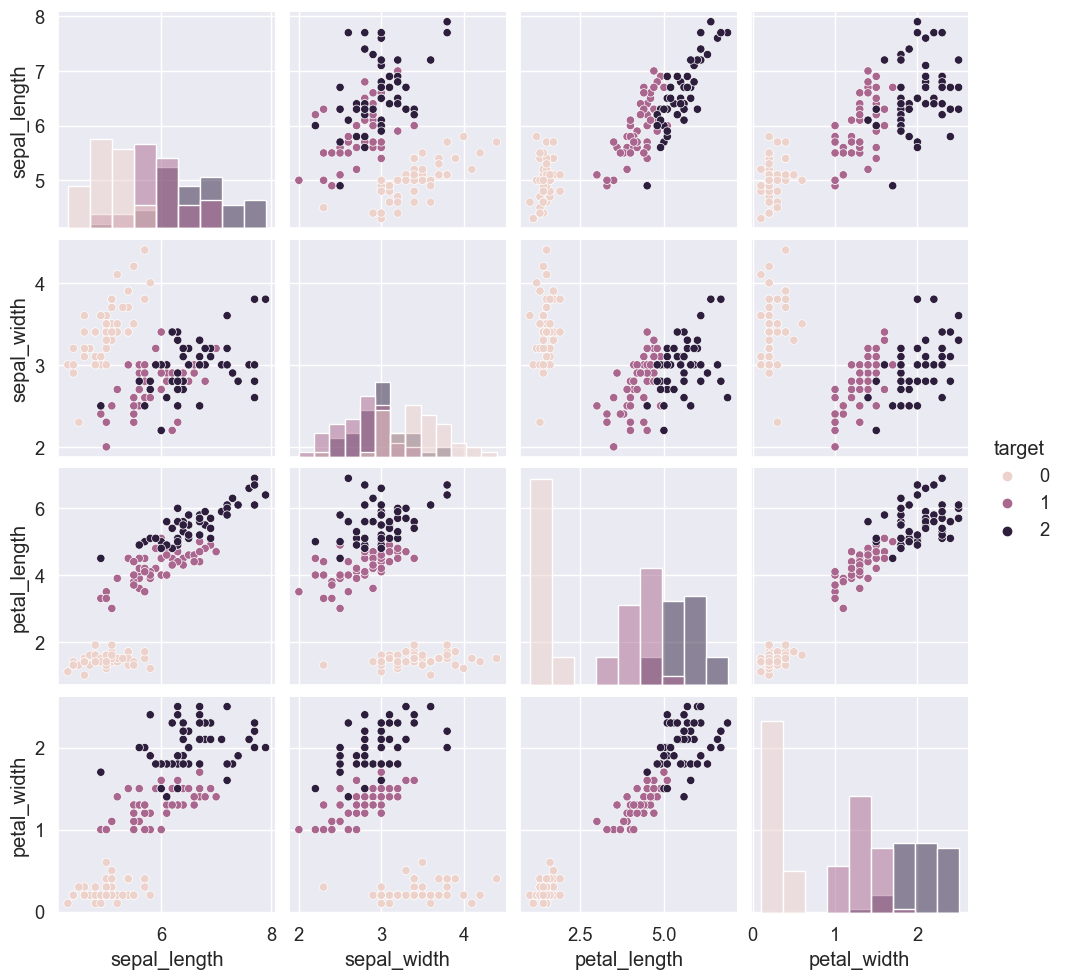

In [25]:
# 시본 pariplot을 이용하면 서로 다른 피처 간 관계를 나타내는 그래프를 한번에 그릴 수 있다.

sns.pairplot(df, hue = 'target', size = 2.5, diag_kind='hist')
plt.show()


- Train-Test 데이터셋 분할
- 모델 학습에 사용할 훈련 데이터와 모델 성능을 평가하는데 사용할 테스트 데이터를 분할한다.
- 사이킷런 train_test_split 함수를 사용하면 편리하게 나눌 수 있다.

In [26]:
from sklearn.model_selection import train_test_split


X_data = df.loc[:,'sepal_length':'petal_width']
y_data = df.loc[:,'target']

X_train,X_test, y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,
                                                shuffle=True, random_state=20)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


- 분류 알고리즘(1) KNN
- KNN (K-Nearest-Neighbors) 분류 알고리즘은 예측하려는 데이터 x가 주어지면, 기존 데이터 중 속성이 비슷한 k개의 이웃을 찾는다.
- x를 둘러싼 k개의 가장 가까운 이웃을 찾고, 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측값으로 결정한다.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred[:5])

예측값:  [0 1 1 2 1]


- 모델의 성능을 평가하기 위해 사이킷런 metrics 모듈에서 accuracy_score 함수를 불러온다.
- 테스트 데이터 X-test 의 정답 레이블인 y_test를 모델의 예측값인 y_knn_pred를 입력하면 비교하여 정확도를 산출한다.

In [29]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy:%.4f" % knn_acc)

Accuracy:0.9667


- 분류 알고리즘 -SVM
- Support Vector Machine은 데이터 셋의 각 피처(열) 벡터 들이 고유의 축을 갖는 벡터 공간을 이룬다고 가정을 하고 시작
- 모든 데이터를 벡터 공간 내의 좌표에 점으로 표시하고, 각 데이터가 속하는 목표 클래스 별로 군집을 이룬다고 생각.
- 각 군집까지의 거리를 최대한 멀리 유지하는 경게면을 찾는다.

In [30]:
from sklearn.svm import SVC

# 'rbf'는 Radial Basis Function을 말한다.
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [31]:
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:5])

svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy:%.4f" % svc_acc)

예측값:  [0 1 1 2 1]
Accuracy:1.0000


#### 로지스틱 회귀
- logistic Regression는 회귀라는 이름을 사용하지만,
- 실제로는 분류 알고리즘이다.
- 시그모이드 함수의 출력값(0~1사이의 실수)를 각 분류 클래스에 속하게 될 확률값으로 사용한다.
- 데이터 셋을 학습하여 각 품종에 속하는 확률을 0~1 사이의 값으로 계산하고
- 1에 가까우면 해당 클래스로 분류, 0에 가까우면 아니라고 분류한다.


In [33]:
# sklearn선형 모델에서 로지스틱 회귀 불러오기
from sklearn.linear_model import LogisticRegression 

#lrc에 logisticRegression객체를 생성한다.
lrc = LogisticRegression()

# fit메소드에 훈련데이터를 입력하여 학습을 진행한다.
lrc.fit(X_train,y_train)

LogisticRegression()

In [41]:
# predict 메소드에 입력하여 예측한 결과
y_lrc_pred = lrc.predict(X_test)
print("예측값 :  ",y_lrc_pred[:5])

# 성능 평가
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy : %.4f" % lrc_acc)

예측값 :   [0 1 1 2 1]
Accuracy : 1.0000


In [45]:
#확률값 예측

# predict_proba 메소드를 사용하면 각 클래스에 속할 확률값을 예측한다.

y_lrc_prob = lrc.predict_proba(X_test)
y_lrc_prob

array([[9.83094453e-01, 1.69054897e-02, 5.76296529e-08],
       [4.60695419e-03, 8.41457867e-01, 1.53935179e-01],
       [1.03674350e-02, 9.20150914e-01, 6.94816505e-02],
       [2.57653453e-05, 5.16404320e-02, 9.48333803e-01],
       [2.39285752e-02, 9.52024046e-01, 2.40473786e-02],
       [2.93669509e-02, 9.25894811e-01, 4.47382378e-02],
       [4.78595240e-06, 1.77678503e-02, 9.82227364e-01],
       [9.80412539e-01, 1.95873477e-02, 1.13561801e-07],
       [1.22340641e-05, 6.66974152e-02, 9.33290351e-01],
       [9.75406644e-01, 2.45932922e-02, 6.41394103e-08],
       [2.73417382e-05, 2.71305939e-02, 9.72842064e-01],
       [1.71527508e-03, 7.49886865e-01, 2.48397860e-01],
       [7.53070084e-04, 4.91860262e-01, 5.07386668e-01],
       [9.84534269e-01, 1.54657026e-02, 2.81278605e-08],
       [9.76953892e-01, 2.30460443e-02, 6.38290844e-08],
       [1.28093807e-03, 2.60492109e-01, 7.38226953e-01],
       [9.91798182e-01, 8.20180683e-03, 1.12005938e-08],
       [4.15671365e-03, 8.61227

- 첫 번째 열은 클래스 0  
- 두 번째 열은 클래스 1  
- 세 번째 열은 클래스 2 

- 첫번째 행에 0번째 열의 확률이 98%로 가장크기 때문에 클래스 0으로 분류된다.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=20)

In [48]:
y_dtc_pred = dtc.predict(X_test)
print("예측값 : ",y_dtc_pred[:5])

dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy:%.4f" % dtc_acc)

예측값 :  [0 1 1 2 1]
Accuracy:0.9333
